In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import os
from supervised.automl import AutoML
import category_encoders as ce
import math

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from category_encoders import TargetEncoder
from sklearn.metrics import median_absolute_error
print('Imported sci-kit learn and AutoML libraries!')

Imported sci-kit learn and AutoML libraries!


## Let's compare some other AutoML libraries to see if we can improve our results any further

In [2]:
irl =  pd.read_csv('sub-dub-encoded.csv', index_col = 'Unnamed: 0')

In [3]:
irl1 = pd.read_csv('initial-ml-test-dub-1.csv', index_col = 'Unnamed: 0')

In [4]:
irl['LogPrice (€)']

207901    13.648757
207905    13.532203
207916    12.824045
207925    12.099628
207929    12.569631
            ...    
261963    12.936154
261968    13.169684
262028    12.542545
262032    14.022525
262033    13.617060
Name: LogPrice (€), Length: 5386, dtype: float64

In [5]:
irl.head(1)

,UsedProperty,Property Size Description,Year,Month,Town,Apartment,Neighbourhood,Eircode,Latitude,Longitude,DistanceIFSC,DistanceSchool,DistancePark,DistanceSecSchool,LogPrice (€)
207901,0,1,2014,1,601864.418417,0,899721.0,628715.337138,53.307878,-6.335665,7.541595,0.49212,1.438826,0.156609,13.648757


In [6]:
irl1.head(1)

,Address,County,Price (€),VAT Exclusive,UsedProperty,Property Size Description,Year,Month,Town,Apartment,...,DistanceIFSC,DistanceSchool,DistancePark,DistanceLuas,DistanceSecSchool,DistanceGPO,DistanceHospital,DistanceBeach,DistanceCar,DistanceShops
207901,"55 College Square, Terenure",Dublin,447200.0,0,0,1,2014,1,Terenure,0,...,7.541595,0.49212,1.438826,2.020029,0.156609,6.587209,2.344404,18.071721,5.4279,3.568079


In [7]:
irl.drop(columns = ['Longitude', 'Latitude', 'LogPrice (€)', 'Town', 'Neighbourhood', 'Eircode'], inplace = True)

In [8]:
irl1.head()

,Address,County,Price (€),VAT Exclusive,UsedProperty,Property Size Description,Year,Month,Town,Apartment,...,DistanceIFSC,DistanceSchool,DistancePark,DistanceLuas,DistanceSecSchool,DistanceGPO,DistanceHospital,DistanceBeach,DistanceCar,DistanceShops
207901,"55 College Square, Terenure",Dublin,447200.00,0,0,1,2014,1,Terenure,0,...,7.541595,0.492120,1.438826,2.020029,0.156609,6.587209,2.344404,18.071721,5.427900,3.568079
207905,"Number 7 Belfort House, Sydenham Villas, Dundrum",Dublin,398000.00,1,1,0,2014,1,Dundrum Dublin,0,...,6.817210,0.100996,2.784711,0.274841,0.831639,7.118560,3.635958,14.874822,5.905557,0.255856
207916,"Apartment 16 Cedar Grove, Firhouse Road, Templ...",Dublin,196035.24,0,0,1,2014,1,Templeogue,1,...,7.799393,0.683556,3.098765,3.760897,0.968202,7.197697,3.879724,17.923987,6.179356,3.002563
207925,"75 Palmerstown Avenue, Palmerstown",Dublin,95000.00,1,1,1,2014,1,Palmerstown,0,...,8.400802,0.319564,1.909348,3.576775,0.262801,7.051363,3.811554,18.189754,6.208934,1.206681
207929,"17 Churchview Apts, Church Rd, Drumcondra",Dublin,152000.00,1,1,2,2014,1,Drumcondra,1,...,2.225835,0.085034,0.909828,1.942439,0.597393,1.805008,0.902578,10.897507,1.587952,1.815296


In [9]:
irl.head()

,UsedProperty,Property Size Description,Year,Month,Apartment,DistanceIFSC,DistanceSchool,DistancePark,DistanceSecSchool
207901,0,1,2014,1,0,7.541595,0.492120,1.438826,0.156609
207905,1,0,2014,1,0,6.817210,0.100996,2.784711,0.831639
207916,0,1,2014,1,1,7.799393,0.683556,3.098765,0.968202
207925,1,1,2014,1,0,8.400802,0.319564,1.909348,0.262801
207929,1,2,2014,1,1,2.225835,0.085034,0.909828,0.597393


In [10]:
irl = irl.join(irl1[['Longitude', 'Latitude', 'Price (€)', 'Town', 'Neighbourhood', 'Eircode']])

In [11]:
irl.head(1)

,UsedProperty,Property Size Description,Year,Month,Apartment,DistanceIFSC,DistanceSchool,DistancePark,DistanceSecSchool,Longitude,Latitude,Price (€),Town,Neighbourhood,Eircode
207901,0,1,2014,1,0,7.541595,0.49212,1.438826,0.156609,-6.335665,53.307878,447200.0,Terenure,College Square Terenure,D6W


In [12]:
encoder = TargetEncoder()
irl['Town'] = encoder.fit_transform(irl['Town'], irl['Price (€)'])

In [13]:
encoder = TargetEncoder()
irl['Neighbourhood'] = encoder.fit_transform(irl['Neighbourhood'], irl['Price (€)'])

In [14]:
encoder = TargetEncoder()
irl['Eircode'] = encoder.fit_transform(irl['Eircode'], irl['Price (€)'])

In [15]:
irl['LogPrice (€)'] = np.log(irl['Price (€)'])
irl.drop(columns = ['Price (€)'], inplace = True)
irl.head()

,UsedProperty,Property Size Description,Year,Month,Apartment,DistanceIFSC,DistanceSchool,DistancePark,DistanceSecSchool,Longitude,Latitude,Town,Neighbourhood,Eircode,LogPrice (€)
207901,0,1,2014,1,0,7.541595,0.492120,1.438826,0.156609,-6.335665,53.307878,428603.796167,5.950927e+05,454593.516700,13.010761
207905,1,0,2014,1,0,6.817210,0.100996,2.784711,0.831639,-6.238896,53.288227,499010.652149,1.120920e+06,499010.652149,12.894207
207916,0,1,2014,1,1,7.799393,0.683556,3.098765,0.968202,-6.312400,53.291600,564023.918947,4.362543e+05,454593.516700,12.186050
207925,1,1,2014,1,0,8.400802,0.319564,1.909348,0.262801,-6.372213,53.353853,319537.941091,2.319509e+05,317917.959890,11.461632
207929,1,2,2014,1,1,2.225835,0.085034,0.909828,0.597393,-6.263792,53.366311,428629.688519,1.728438e+05,305517.216068,11.931636


In [16]:
# actual price not inflated prices now
# worth maybe looking at changing target encoding to focus on this so? just to see
irl['LogPrice (€)']

207901    13.010761
207905    12.894207
207916    12.186050
207925    11.461632
207929    11.931636
            ...    
261963    12.936154
261968    13.169684
262028    12.542545
262032    14.022525
262033    13.617060
Name: LogPrice (€), Length: 5386, dtype: float64

In [17]:
# this function finds all values that fall within internationally accepted +-10% of actual prices in our predictions
# we can modify the threshold as we feel the need to here
def accuracy_threshold(test, pred, num):
    test = np.array(test)
    pred = np.array(pred)
# get within x% of actual price , not within log price as this will be misleading / incorrect
    test = np.exp(test)
    pred = np.exp(pred)
    count = 0
    for i in range(len(pred)):
        if test[i] != 0:  
            ten = test[i] * num
            res = test[i] - pred[i]
        else:
            res = 0
            ten = 0
        
        if res < 0:
            res = res * -1
        else:
            res = res
            
        if res <= ten:
            count += 1
        else:
            continue
    return (count / len(test))

In [18]:
from tpot import TPOTRegressor
from sklearn.model_selection import RepeatedKFold

## 2021

### TPOT

In [19]:
specific21 = irl[irl['Year'] > 2017]

In [20]:
train_21 = specific21[specific21['Year'] < 2021]

In [21]:
test_21 = specific21[specific21['Year'] == 2021]

In [22]:
x_train_21 = train_21.loc[:, train_21.columns != 'LogPrice (€)']
y_train_21 = train_21['LogPrice (€)']

In [23]:
x_test_21 = test_21.loc[:, test_21.columns != 'LogPrice (€)']
y_test_21 = test_21['LogPrice (€)']

In [24]:
#cv = RepeatedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
# define search
model = TPOTRegressor(max_time_mins = 6)
model1 = model.fit(x_train_21, y_train_21)

In [25]:
#model1.export('tpot_2021_pipeline-standard-price.py')

In [26]:
# calculated values
from sklearn.metrics import mean_squared_error
y_predicted_21 = model1.predict(x_test_21)
  
# Calculation of Mean Squared Error (MSE)
mse = mean_squared_error(y_test_21, y_predicted_21)
print('MSE for TPOT AutoML 2021 is: ' + str(mse))

MSE for TPOT AutoML 2021 is: 0.0866646787130433


X does not have valid feature names, but LassoLarsCV was fitted with feature names


In [27]:
rmse = mean_squared_error(y_test_21, y_predicted_21, squared=False)
print('RMSE for TPOT AutoML 2021 is: ' + str(rmse))

RMSE for TPOT AutoML 2021 is: 0.2943886524868839


In [28]:
median_se = np.square(np.subtract(y_test_21, y_predicted_21)).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

0.09133394184980048


In [29]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test_21, y_predicted_21)
print("MAPE for TPOT AutoML 2021 is: " + str(mape))

MAPE for TPOT AutoML 2021 is: 0.013820982245206248


In [30]:
acc = accuracy_threshold(y_test_21, y_predicted_21, 0.1)

In [36]:
%%capture
explainer1test = shap.Explainer(model1.predict, x_test_21)
shap_values1test = explainer1test(x_test_21)

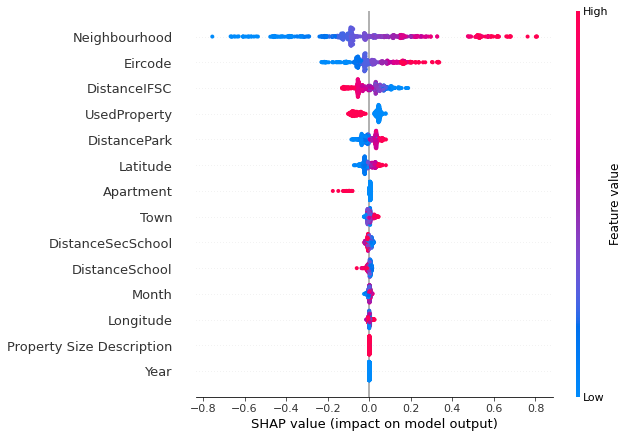

In [38]:
f = plt.figure()
shap.summary_plot(shap_values1test, x_test_21)
f.savefig("summary_plot21.png", bbox_inches = 'tight', dpi = 600)

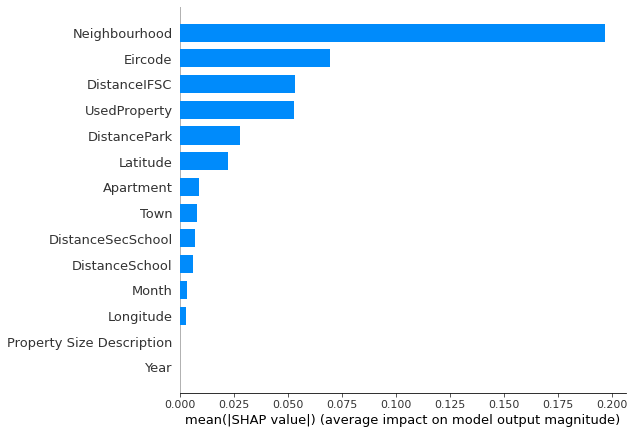

In [39]:
shap.summary_plot(shap_values1test, x_test_21, plot_type = 'bar')

In [40]:
cnames=['Algorithm', 'Year', 'RMSE', 'MSE', 'MEDAE', 'Accuracy', 'MAPE']
df11 = pd.DataFrame(columns=cnames)

df11 = df11.append({'Algorithm': 'TPOT AutoML',
            'Year': 2021,
           'RMSE': rmse,
           'MSE': mse,
           'MEDAE': med,
           'Accuracy': acc,
           'MAPE': mape         
          }, ignore_index=True)

In [41]:
dfreal1 = pd.DataFrame(y_test_21.values)
dfpred1 = pd.DataFrame(y_predicted_21)

### 2020

In [42]:
specific20 = irl[irl['Year'] > 2016]

In [43]:
test_20 = specific20[specific20['Year'] == 2020]
train_20 = specific20[specific20['Year'] < 2020]

x_train_20 = train_20.loc[:, train_20.columns != 'LogPrice (€)']
y_train_20 = train_20['LogPrice (€)']

x_test_20 = test_20.loc[:, test_20.columns != 'LogPrice (€)']
y_test_20 = test_20['LogPrice (€)']

In [44]:
model = TPOTRegressor(max_time_mins = 6)
model2 = model.fit(x_train_20, y_train_20)

In [45]:
#model2.export('tpot_2020_pipeline-standardprice.py')

In [46]:
y_predicted_20 = model1.predict(x_test_20)
  
# Calculation of Mean Squared Error (MSE)
mse = mean_squared_error(y_test_20, y_predicted_20)
print('MSE for TPOT AutoML 2020 is: ' + str(mse))

MSE for TPOT AutoML 2020 is: 0.0359071125338975


X does not have valid feature names, but LassoLarsCV was fitted with feature names


In [47]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test_20, y_predicted_20)
print("MAPE for TPOT AutoML 2020 is: " + str(mape))

MAPE for TPOT AutoML 2020 is: 0.008925823370470112


In [48]:
median_se = np.square(np.subtract(y_test_20, y_predicted_20)).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

0.05744317723097403


In [49]:
rmse = mean_squared_error(y_test_20, y_predicted_20, squared=False)
print('RMSE for TPOT AutoML 2020 is: ' + str(rmse))

RMSE for TPOT AutoML 2020 is: 0.1894917215444978


In [50]:
acc = accuracy_threshold(y_test_20, y_predicted_20, 0.1)

In [51]:
cnames=['Algorithm', 'Year', 'RMSE', 'MSE', 'MEDAE', 'Accuracy', 'MAPE']
df12 = pd.DataFrame(columns=cnames)

df12 = df12.append({'Algorithm': 'TPOT AutoML',
            'Year': 2020,
           'RMSE': rmse,
           'MSE': mse,
           'MEDAE': med,
           'Accuracy': acc,
           'MAPE': mape         
          }, ignore_index=True)

In [52]:
dfreal2 = pd.DataFrame(y_test_20.values)
dfpred2 = pd.DataFrame(y_predicted_20)

In [53]:
%%capture
explainer2 = shap.Explainer(model2.predict, x_test_20)
shap_values2 = explainer2(x_test_20)

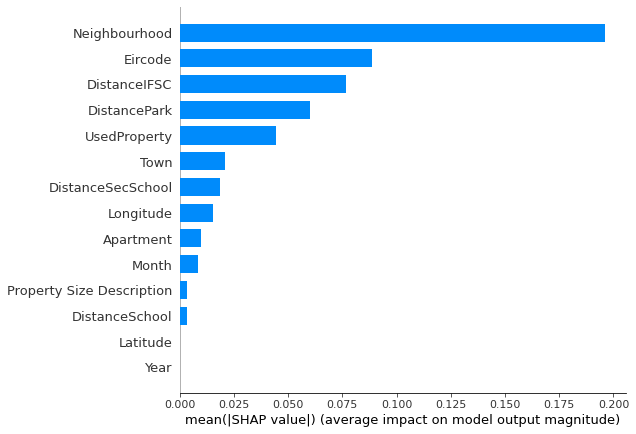

In [54]:
shap.summary_plot(shap_values2, x_test_20, plot_type = 'bar')

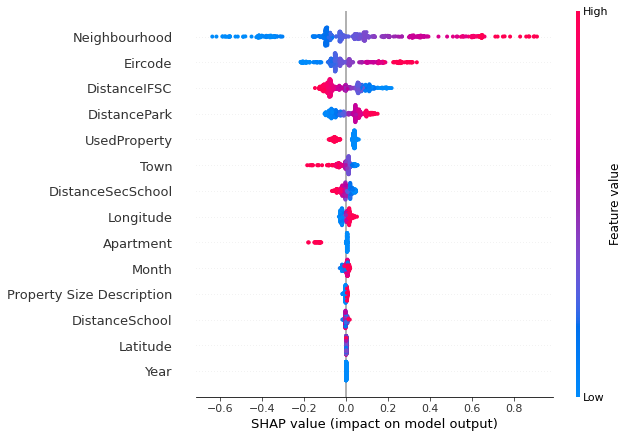

In [55]:
f = plt.figure()
shap.summary_plot(shap_values2, x_test_20)
f.savefig("summary_plot20.png", bbox_inches = 'tight', dpi = 600)

### 2019

In [56]:
specific19 = irl[irl['Year'] > 2015]

In [57]:
test_19 = specific19[specific19['Year'] == 2019]
train_19 = specific19[specific19['Year'] < 2019]
x_train_19 = train_19.loc[:, train_19.columns != 'LogPrice (€)']
y_train_19 = train_19['LogPrice (€)']
x_test_19 = test_19.loc[:, test_19.columns != 'LogPrice (€)']
y_test_19 = test_19['LogPrice (€)']

In [58]:
model = TPOTRegressor(max_time_mins = 6)
# perform the search // takes ages to run!
model3 = model.fit(x_train_19, y_train_19)

In [59]:
#model3.export('tpot_2019_pipeline-standardprice.py')

In [60]:
y_predicted_19 = model1.predict(x_test_19)
  
# Calculation of Mean Squared Error (MSE)
mse = mean_squared_error(y_test_19, y_predicted_19)
print('MSE for TPOT AutoML 2019 is: ' + str(mse))

MSE for TPOT AutoML 2019 is: 0.027426998664857385


X does not have valid feature names, but LassoLarsCV was fitted with feature names


In [61]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test_19, y_predicted_19)
print("MAPE for TPOT AutoML 2019 is: " + str(mape))

MAPE for TPOT AutoML 2019 is: 0.008329787799032908


In [62]:
median_se = np.square(np.subtract(y_test_19, y_predicted_19)).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

0.0688622974379489


In [63]:
rmse = mean_squared_error(y_test_19, y_predicted_19, squared = False)
print('RMSE for TPOT AutoML 2019 is: ' + str(rmse))

RMSE for TPOT AutoML 2019 is: 0.16561098594253157


In [64]:
acc = accuracy_threshold(y_test_19, y_predicted_19, 0.1)

In [65]:
%%capture
explainer3 = shap.Explainer(model3.predict, x_test_19)
shap_values3 = explainer3(x_test_19)

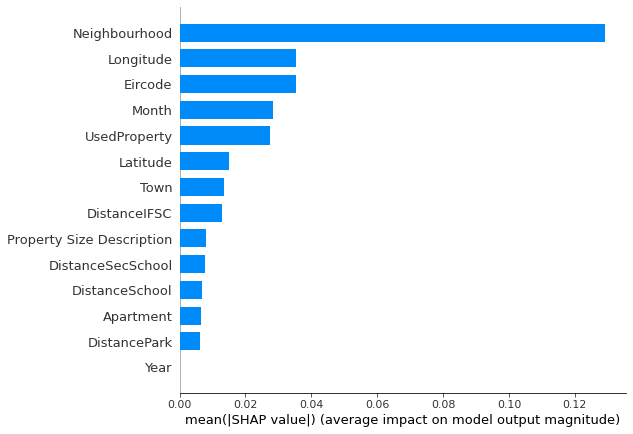

In [66]:
shap.summary_plot(shap_values3, x_test_19, plot_type = 'bar')
#plt.savefig('shap19standard.png')

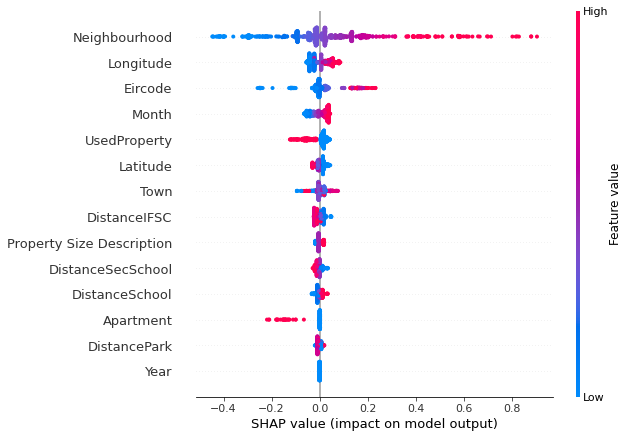

In [67]:
f = plt.figure()
shap.summary_plot(shap_values3, x_test_19)
f.savefig("summary_plot19.png", bbox_inches = 'tight', dpi = 600)

In [68]:
cnames=['Algorithm', 'Year', 'RMSE', 'MSE', 'MEDAE', 'Accuracy', 'MAPE']
df13 = pd.DataFrame(columns = cnames)

df13 = df13.append({'Algorithm': 'TPOT AutoML',
            'Year': 2019,
           'RMSE': rmse,
           'MSE': mse,
           'MEDAE': med,
           'Accuracy': acc,
           'MAPE': mape         
          }, ignore_index=True)

In [69]:
dfreal3 = pd.DataFrame(y_test_19.values)
dfpred3 = pd.DataFrame(y_predicted_19)

### 2018

In [70]:
specific18 = irl[irl['Year'] > 2014]
test_18 = specific18[specific18['Year'] == 2018]
train_18 = specific18[specific18['Year'] < 2018]

x_train_18 = train_18.loc[:, train_18.columns != 'LogPrice (€)']
y_train_18 = train_18['LogPrice (€)']
x_test_18 = test_18.loc[:, test_18.columns != 'LogPrice (€)']
y_test_18 = test_18['LogPrice (€)']

In [71]:
model = TPOTRegressor(max_time_mins = 6)
# perform the search // takes ages to run!
model4 = model.fit(x_train_18, y_train_18)

In [72]:
#model4.export('tpot_2018_pipeline-standardprice.py')

In [73]:
y_predicted_18 = model1.predict(x_test_18)
  
# Calculation of Mean Squared Error (MSE)
mse = mean_squared_error(y_test_18, y_predicted_18)
print('MSE for TPOT AutoML 2018 is: ' + str(mse))

MSE for TPOT AutoML 2018 is: 0.04977776547363667


X does not have valid feature names, but LassoLarsCV was fitted with feature names


In [74]:
rmse = mean_squared_error(y_test_18, y_predicted_18, squared = False)
print('RMSE for TPOT AutoML 2018 is: ' + str(rmse))

RMSE for TPOT AutoML 2018 is: 0.22310931283484486


In [75]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test_18, y_predicted_18)
print("MAPE for TPOT AutoML 2018 is: " + str(mape))

MAPE for TPOT AutoML 2018 is: 0.009889496982678844


In [76]:
median_se = np.square(np.subtract(y_test_18, y_predicted_18)).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

0.06322013414777672


In [77]:
acc = accuracy_threshold(y_test_18, y_predicted_18, 0.1)

In [78]:
%%capture
explainer4 = shap.Explainer(model4.predict, x_test_18)
shap_values4 = explainer4(x_test_18)

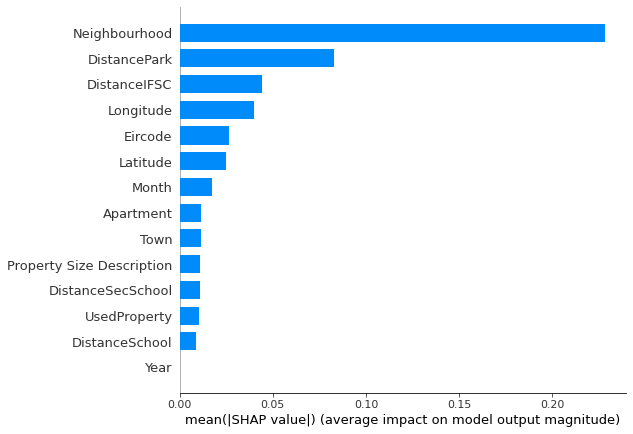

In [79]:
shap.summary_plot(shap_values4, x_test_18, plot_type = 'bar')
#plt.savefig('shap18standard.PNG')

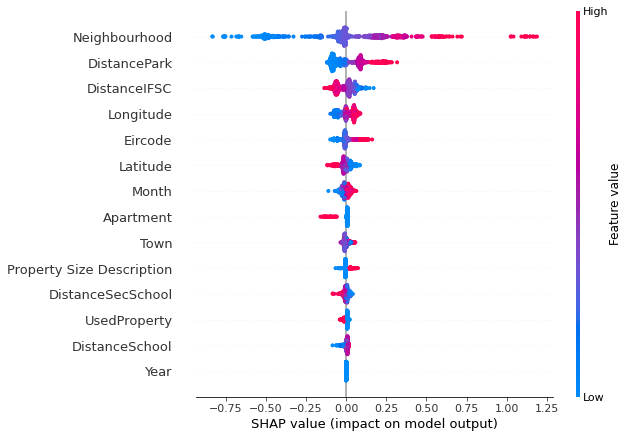

In [80]:
f = plt.figure()
shap.summary_plot(shap_values4, x_test_18)
f.savefig("summary_plot18.png", bbox_inches = 'tight', dpi = 600)

In [81]:
cnames=['Algorithm', 'Year', 'RMSE', 'MSE', 'MEDAE', 'Accuracy', 'MAPE']
df14 = pd.DataFrame(columns=cnames)

df14 = df14.append({'Algorithm': 'TPOT AutoML',
            'Year': 2018,
           'RMSE': rmse,
           'MSE': mse,
           'MEDAE': med,
           'Accuracy': acc,
           'MAPE': mape         
          }, ignore_index=True)

In [82]:
dfreal4 = pd.DataFrame(y_test_18.values)
dfpred4 = pd.DataFrame(y_predicted_18)

### 2017

In [83]:
specific17 = irl[irl['Year'] > 2013]
test_17 = specific17[specific17['Year'] == 2017]
train_17 = specific17[specific17['Year'] < 2017]

x_train_17 = train_17.loc[:, train_17.columns != 'LogPrice (€)']
y_train_17 = train_17['LogPrice (€)']
x_test_17 = test_17.loc[:, test_17.columns != 'LogPrice (€)']
y_test_17 = test_17['LogPrice (€)']

In [84]:
model = TPOTRegressor(max_time_mins = 6)
# perform the search // takes ages to run!
model5 = model.fit(x_train_17, y_train_17)

In [85]:
#model5.export('tpot_2017_pipeline-standardprice.py')

In [86]:
y_predicted_17 = model1.predict(x_test_17)
  
# Calculation of Mean Squared Error (MSE)
mse = mean_squared_error(y_test_17, y_predicted_17)
print('MSE for TPOT AutoML 2017 is: ' + str(mse))

MSE for TPOT AutoML 2017 is: 0.08921593042232903


X does not have valid feature names, but LassoLarsCV was fitted with feature names


In [87]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test_17, y_predicted_17)
print("MAPE for TPOT AutoML 2017 is: " + str(mape))

MAPE for TPOT AutoML 2017 is: 0.015194152873986322


In [88]:
median_se = np.square(np.subtract(y_test_17, y_predicted_17)).median() 
 
med = math.sqrt(median_se)
print("Median Absolute Error:\n")
print(med)

Median Absolute Error:

0.11726231195750188


In [89]:
rmse = mean_squared_error(y_test_17, y_predicted_17, squared=False)
print('RMSE for TPOT AutoML 2017 is: ' + str(rmse))

RMSE for TPOT AutoML 2017 is: 0.2986903587702975


In [90]:
acc = accuracy_threshold(y_test_17, y_predicted_17, 0.1)

In [91]:
%%capture
explainer5 = shap.Explainer(model5.predict, x_test_17)
shap_values5 = explainer5(x_test_17)

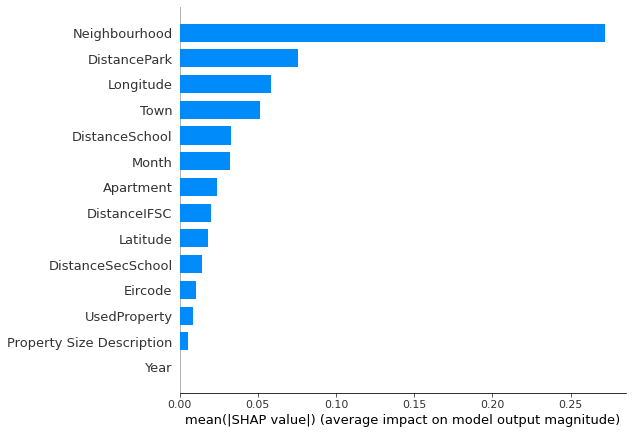

In [92]:
shap.summary_plot(shap_values5, x_train_17, plot_type = 'bar')
#plt.savefig('shap17standard.png')

In [94]:
#shap.dependence_plot('DistancePark', shap_values5, x_test_17)

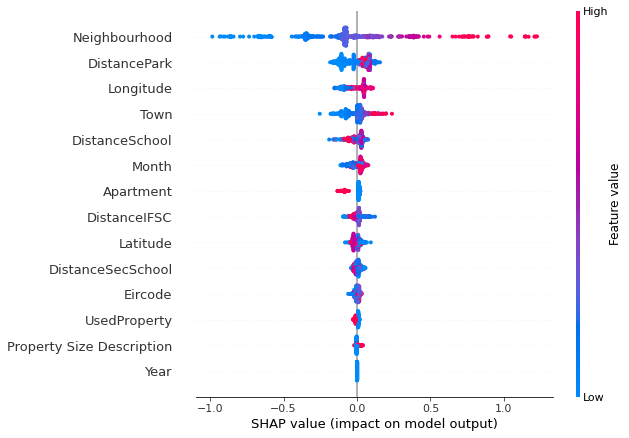

In [95]:
f = plt.figure()
shap.summary_plot(shap_values5, x_test_17)
f.savefig("summary_plot17.png", bbox_inches = 'tight', dpi = 600)

In [96]:
dfreal5 = pd.DataFrame(y_test_17.values)
dfpred5 = pd.DataFrame(y_predicted_17)

In [97]:
cnames=['Algorithm', 'Year', 'RMSE', 'MSE', 'MEDAE', 'Accuracy', 'MAPE']
df15 = pd.DataFrame(columns=cnames)

df15 = df15.append({'Algorithm': 'TPOT AutoML',
            'Year': 2017,
           'RMSE': rmse,
           'MSE': mse,
           'MEDAE': med,
           'Accuracy': acc,
           'MAPE': mape         
          }, ignore_index=True)

In [98]:
vis1 = pd.concat([df11, df12, df13, df14, df15], ignore_index=True)

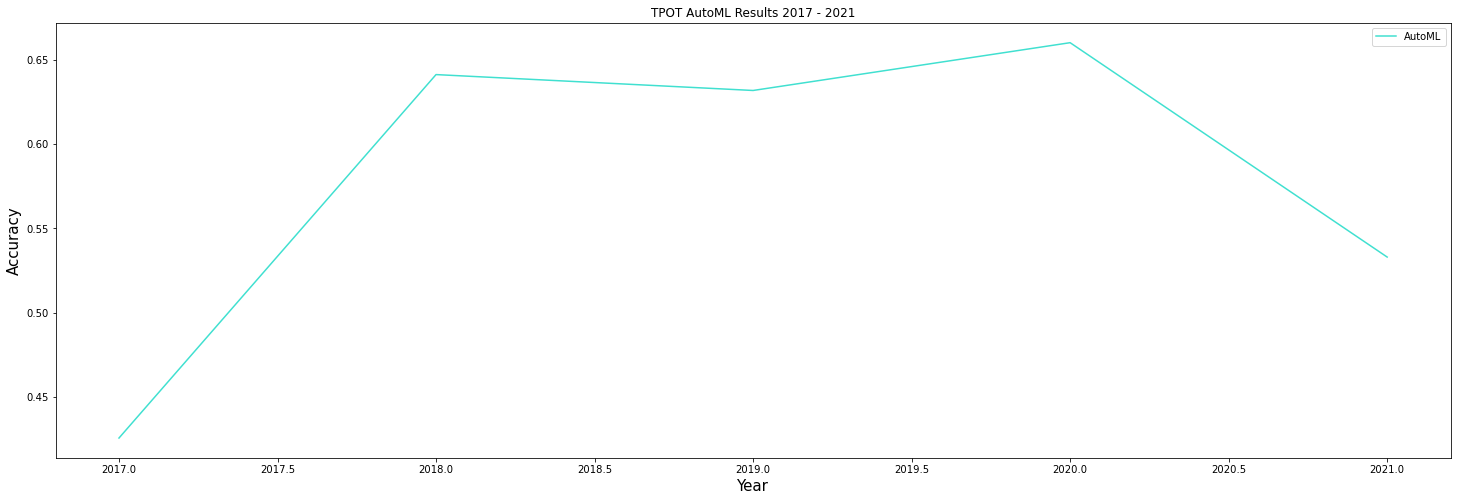

In [99]:
# don't need cross validation same training due to set intervals?
plt.subplots(figsize = (25, 8))
plt.plot(vis1['Year'], vis1['Accuracy'], label = 'AutoML', color = 'turquoise')
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.title('TPOT AutoML Results 2017 - 2021')
plt.legend()
plt.show()

In [100]:
print("Mean accuracy for TPOT AutoML over period 2017-2021 is: " + str(vis1['Accuracy'].mean()))

Mean accuracy for TPOT AutoML over period 2017-2021 is: 0.5784136848486682


In [101]:
actual = pd.concat([dfreal1, dfreal2, dfreal3, dfreal4, dfreal5], ignore_index = True)
actual.rename(columns = {0: 'Actual'}, inplace = True)
actual.head()

,Actual
0,12.624668
1,12.747268
2,13.072690
3,12.797276
4,12.653239


In [102]:
pred = pd.concat([dfpred1, dfpred2, dfpred3, dfpred4, dfpred5], ignore_index = True)
pred.rename(columns={0: 'Predicted'}, inplace = True)
pred.head()

,Predicted
0,12.676535
1,12.695897
2,12.716126
3,12.748187
4,12.695897


In [103]:
actualvpred = actual.join(pred)

In [104]:
actualvpred.head()

,Actual,Predicted
0,12.624668,12.676535
1,12.747268,12.695897
2,13.072690,12.716126
3,12.797276,12.748187
4,12.653239,12.695897


In [105]:
exp = np.exp(actualvpred)

In [106]:
exp.shape

(3287, 2)

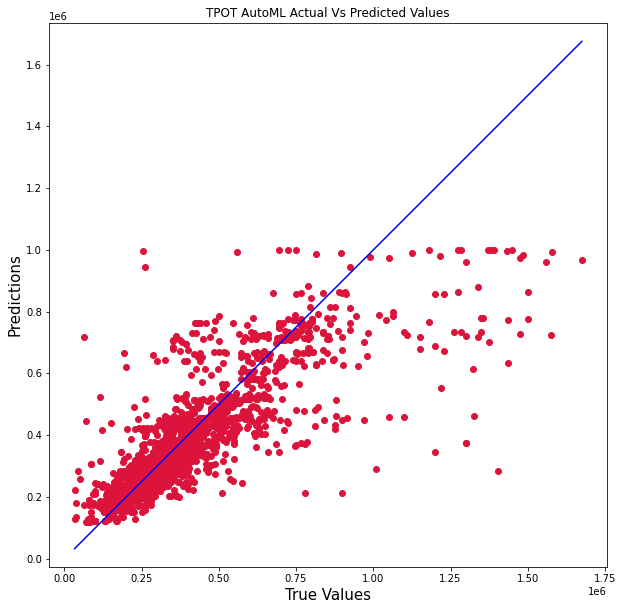

In [107]:
# plot predicted vs actual
plt.figure(figsize = (10, 10))
plt.scatter(exp['Actual'], exp['Predicted'], c = 'crimson')

p1 = max(max(exp['Predicted']), max(exp['Actual']))
p2 = min(min(exp['Predicted']), min(exp['Actual']))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize = 15)
plt.ylabel('Predictions', fontsize = 15)
plt.title('TPOT AutoML Actual Vs Predicted Values')
plt.axis('equal')
plt.show()

In [108]:
#### try to do location plot but its rounding longitude and latitude values which is useless
#### its also returning nulls for these values when i joined with actual/predicted df 
#### maybe have to leave it?

### AutoKeras

In [109]:
import autokeras as ak
# It tries 10 different models.
#y_train_21_pd = pd.DataFrame(y_train_21)
#reg = ak.StructuredDataRegressor(max_trials = 10, loss = 'mean_absolute_error')
# Feed the structured data regressor with training data.
#reg.fit(x_train_21, y_train_21_pd, epochs = 50)
# Predict with the best model.
#print(reg.evaluate(x_test_21, y_test_21))

In [110]:
#predicted_21 = reg.predict(x_test_21)
#y_test_21_pd = pd.DataFrame(y_test_21)
#accuracy_threshold(y_test_21, predicted_21, 0.1)

### AutoViml

In [111]:
from autoviml.Auto_ViML import Auto_ViML

Imported Auto_ViML version: 0.1.684. Call using:
             m, feats, trainm, testm = Auto_ViML(train, target, test,
                            sample_submission='',
                            scoring_parameter='', KMeans_Featurizer=False,
                            hyper_param='RS',feature_reduction=True,
                             Boosting_Flag='CatBoost', Binning_Flag=False,
                            Add_Poly=0, Stacking_Flag=False,Imbalanced_Flag=False,
                            verbose=1)
            

Imported Auto_NLP version: 0.0.47.. Call using:
     train_nlp, test_nlp, nlp_pipeline, predictions = Auto_NLP(
                nlp_column, train, test, target, score_type='balanced_accuracy',
                modeltype='Classification',top_num_features=200, verbose=0,
                build_model=True)


In [112]:
#irl.columns

In [113]:
#target = 'LogPrice (€)'

In [114]:
#model, features, trainm, testm = Auto_ViML(
#    train_21,
#    target,
#    test_21,
#    hyper_param = "GS",
#    feature_reduction = True,
#    KMeans_Featurizer = False,
#    Boosting_Flag = False,
#    Binning_Flag = True,
#    Add_Poly = False,
#    Stacking_Flag = False,
#    Imbalanced_Flag = False,
#    verbose = 0,
#)

In [115]:
## order changes results very strange
#predicted_21_mod = model.predict(testm[['DistanceSchool', 'Town_bin', 'Longitude_bin', 'DistanceIFSC_bin', 'Latitude_bin', 'DistanceSecSchool_bin']])
#accuracy_threshold(y_test_21, predicted_21_mod, 0.1)

In [116]:
### boosting 
#model, features, trainm, testm = Auto_ViML(
#    train_21,
#    target,
#    test_21,
#    hyper_param = "GS",
#    feature_reduction = True,
#    KMeans_Featurizer = False,
#    Boosting_Flag = True,
#    Binning_Flag = True,
#    Add_Poly = False,
#    Stacking_Flag = False,
#    Imbalanced_Flag = False,
#    verbose = 0,
#)

In [117]:
#predicted_21_mod = model.predict(testm[['DistanceSchool', 'Town_bin', 'Longitude_bin', 'DistanceIFSC_bin', 'Latitude_bin', 'DistanceSecSchool_bin']])
#accuracy_threshold(y_test_21, predicted_21_mod, 0.1)

In [118]:
### CatBoost
#model, features, trainm, testm = Auto_ViML(
#    train_21,
#    target,
#    test_21,
#    hyper_param = "GS",
#    feature_reduction = True,
#    KMeans_Featurizer = False,
#    Boosting_Flag = 'CatBoost',
#    Binning_Flag = True,
#    Add_Poly = False,
#    Stacking_Flag = False,
#    Imbalanced_Flag = False,
#    verbose = 0,
#)

In [119]:
#predicted_21_mod = model.predict(testm[['DistanceSchool', 'Town_bin', 'Longitude_bin', 'DistanceIFSC_bin', 'Latitude_bin', 'DistanceSecSchool_bin']])
#accuracy_threshold(y_test_21, predicted_21_mod, 0.1)

### Observations 
Really poor results on the whole with the exception of TPOT. TPOT AutoML has returned our best results yet with a mean accuracy of over 55%! This is strong performance without doubt and over 6% better than our previous results.